# The Virtue of the God-fearing Man

Religion is tied deeply into the foundations of human society. From it, we have derived morals, ideologies and entire schools of thought. More often than not, religion is tied to the idea of being a good or moral person. The belief is that if you are a God-fearing person and you follow all of the guidelines set out by your belief system you will be rewarded because you have been a good person. Considering the wide number of religions and ideologies in the world, there is a question of whether or not being a more religious person actually makes you a more moral person. However, it would be irresponsible to presume that I can define whether or not a person's belief or actions make them more moral than another. I will therefore be using moral foundation theory to define what a religious person values most and see how a person who is less religious aligns with those vales. 

We will determine the moral values of a religious person by using data from the General Social Survey to correlate a persons views on various issues with how religious they are. A person will be determined as being more or less religious by how often they attend religious meetings and how fundamentalist they consider their religion.  

First we must import all of the necessary libraries that will help with the calculations and import the data we will need from the General Social Survey

In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

import statsmodels.formula.api as smf
import patsy

gss = pd.read_hdf('gss.hdf5', 'gss')    

There are certain answers from the gss data that is not necessary for our purposes and will in fact interfere with the results. Therefore we need to get rid of data points where respondents answer with phrases like "I Don't Know", "I Would Not Like To Answer" or "This Does Not Apply To Me."

In [81]:
rows = gss['relig'] > 97
gss.loc[rows, 'relig'] = None

rows = gss['attend'] == 9
gss.loc[rows, 'attend'] = None

rows = gss['fund'] == 9
gss.loc[rows, 'fund'] = None

For a general understanding of our selection pool it would be best to create a PMF of respondents religious affiliations. Of the possible answers to the survey: 1 is Protestant, 2 is Catholic, 3 is Jewish, 4 is None, 5 is Other, 6 is Buddhist, 7 is Hindu, 8 is Other eastern religion, 9 is Muslim, 10 is Orthodox Christian, 11 is Christian, 12 is Native American and 13 is Interdenominational

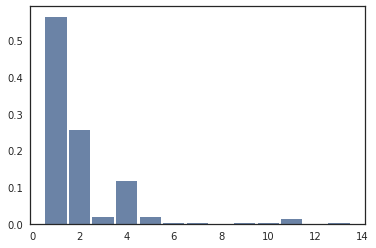

In [82]:
pmf=thinkstats2.Pmf(gss['relig'])
thinkplot.Hist(pmf)
thinkplot.show()

The PMF shows that there is far more Protestant respondents than of any other religion, which means that the data may be skewed in towards the specific beliefs of Protestants or the other Christian denominations that make up a majority of the respondents to the survey.

# Interracial Marriage

The first issue that we will look at is interracial marriage. The General Social Survey posed the question, "Do you think there should be laws against marriages between (Negroes/Blacks/African-Americans) and whites?" The issue of interracial marriage covers many moral foundations including: loyalty, liberty,fairness and sanctity. If a respondent favored having a law against interracial marriage then they would value loyalty and sanctity more than liberty and fairness in this situation. They would prefer to uphold the purity of marriage as a traditional practice by only marrying people within their identified group.

First the data needs to be rearrange so that it is more readable and there are no unnecessary values.

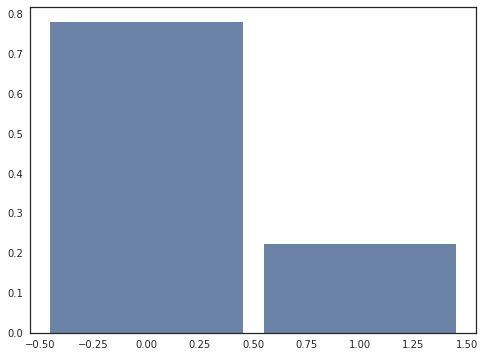

In [83]:
gss = pd.read_hdf('gss.hdf5', 'gss') 
rows = gss['relig'] > 97
gss.loc[rows, 'relig'] = None

rows = gss['attend'] == 9
gss.loc[rows, 'attend'] = None

rows = gss['fund'] == 9
gss.loc[rows, 'fund'] = None

gss['racmar'].replace([0, 8, 9], np.nan, inplace=True)
gss['racmar'].replace(2, 0, inplace=True)
pmf=thinkstats2.Pmf(gss['racmar'])
thinkplot.Hist(pmf)
thinkplot.show()

Creating a PMF of the data shows that a majority of respondents were against a law that banned interracial marriage. Now lets get a deeper look at how religion plays a factor into these opinions.

First the gss data is grouped by how often each respondent attends a religious meeting. In this dataset zero represents never attending religious meetings and 8 represents attending religious meetings everyday. After that we take the mean of the responses for interracial marriage for each group and plot them

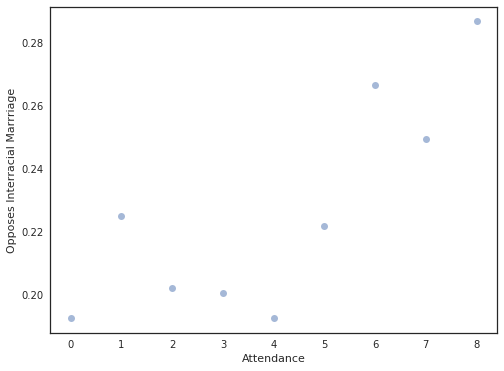

In [84]:
gssReg=gss.groupby('attend')
mean_racmar_by_attendance = gssReg['racmar'].mean()
plt.plot(mean_racmar_by_attendance, 'o', alpha=0.5)
plt.xlabel('Attendance')
plt.ylabel('Opposes Interracial Marrriage')
plt.show()

The relationship between attendance and opposing interracial marriage is not completely linear. It appears that the more a person attends religious meetings the more likely they are to oppose interracial marriage. It is understandable that a person more dedicated to their religion would put more value into purity and loyalty whereas people who do not attend any services do not feel the same importance towards being loyal to a group.

To get a clearer look at the connection between attendance and opinions on interracial marriage, lets take a linear regression of the two. 

In [85]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
gss['attend2']= gss['attend']**2
model = smf.ols('racmar ~ attend + attend2', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 racmar   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     60.87
Date:                Sun, 07 Apr 2019   Prob (F-statistic):           4.19e-27
Time:                        20:17:32   Log-Likelihood:                -15450.
No. Observations:               28585   AIC:                         3.091e+04
Df Residuals:                   28582   BIC:                         3.093e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2019      0.006     35.671      0.000       0.191       0.213
attend        -0.0051      0.004     -1.448      0.148      -0.012       0.002
attend2        0.0018      0.000      4.244      0.000       0.001       0.003
==============================================================================
Omnibus:                     5117.996   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8390.334
Skew:                           1.322   Prob(JB):                         0.00
Kurtosis:                       2.773   Cond. No.                         82.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value of the relationship is very low. There are likely more variables that could better predict opinions on this topic, but that is to be expected. I added the nonlinear relationship of attend2, which is all of the values in the attend dataset squared. From this linear regression model we can make a curve based on the predictions made by the model

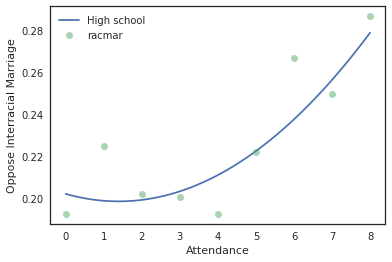

In [86]:
df = pd.DataFrame()
df['attend'] = np.linspace(0, 8)
df['attend2'] = df['attend']**2
pred12 = results.predict(df)

gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['racmar'].mean()

plt.plot(df['attend'], pred12, label='High school')

plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Attendance')
plt.ylabel('Oppose Interracial Marriage')
plt.legend()
plt.show()

The prediction creates a line that mostly fits the the graph of the means that was produced earlier. This shows that the model is pretty accurate to the data that we have in the general social survey. Similarly to the previous graph, we can see that people who attend religious meetings more often support laws against interracial marriage more than those who attend meetings less. Although it is interesting to see that those who rarely attend religious meetings are less likely to support laws against interracial marriage than those who never attend a religious meeting. It is unclear what the cause of this phenomenon it, but we shall see if it continues to be a pattern as we move forward.

Next, we will examine how the fundamentalism of one's religion affect the respondents views on interracial marriage. Fundamentalism is measured on a scale from 1 to 3 where 1 is very fundamentalist and 3 is liberal. Similar to attendance, we will first group the data by the fundamentalism dataset and then take the mean.

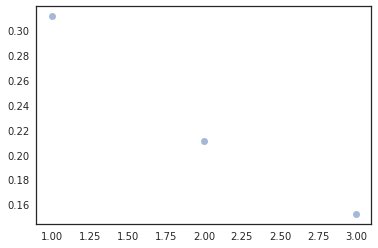

In [87]:
gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['racmar'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.show()

The graph is very linear in compared to the mean graph using attendance as groups. The more fundamentalist a person's religion is the more likely they are to support laws that ban interracial marriage. Lets model the curve and see if we can gain anymore information out of it.

In [88]:
gss['fund2']= gss['fund']**2
model = smf.ols('racmar ~ fund + fund2', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 racmar   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     297.6
Date:                Sun, 07 Apr 2019   Prob (F-statistic):          1.35e-128
Time:                        20:17:34   Log-Likelihood:                -15066.
No. Observations:               27947   AIC:                         3.014e+04
Df Residuals:                   27944   BIC:                         3.016e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4549      0.018     25.087      0.000       0.419       0.490
fund          -0.1646      0.020     -8.219      0.000      -0.204      -0.125
fund2          0.0212      0.005      4.246      0.000       0.011       0.031
==============================================================================
Omnibus:                     4749.794   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7491.308
Skew:                           1.260   Prob(JB):                         0.00
Kurtosis:                       2.708   Cond. No.                         62.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fundamentalism has much better ability to predict opinions on race than the number of religious meetings a respondent attends, but the R-squared value is still very low. A nonlinear function of fund2, which is the fundamentalism dataset squared, to make the model more accurate to the data. Using this model we can then predict a curve that describes the relationship between fundamentalism and interracial marriage.

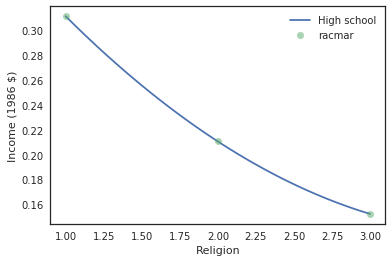

In [89]:
df = pd.DataFrame()
df['fund'] = np.linspace(1, 3)
df['fund2'] = df['fund']**2
pred12 = results.predict(df)

gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['racmar'].mean()

plt.plot(df['fund'], pred12, label='High school')

plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

The graph confirms the previous analysis that the more fundamentalist a person considers their religion, the more likely they are to support laws against interracial marriage.

Now that we have seen the relationship that attendance and fundamentalism have with interracial marriage, we can see how both together can be effective in predicting a respondent's opinion on interracial marriage.

In [90]:
model = smf.ols('racmar ~ attend + attend2 + fund + fund2 + C(relig)', data=gss)
results = model.fit()
results.summary()

/home/jobanner/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 racmar   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     87.40
Date:                Sun, 07 Apr 2019   Prob (F-statistic):          1.90e-178
Time:                        20:17:35   Log-Likelihood:                -14802.
No. Observations:               27682   AIC:                         2.963e+04
Df Residuals:                   27671   BIC:                         2.972e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3866      0.024     15.905      0.000       0.339       0.434
C(relig)[T.2.0]     -0.0743      0.008     -9.808      0.000      -0.089      -0.059
C(relig)[T.3.0]     -0.1253      0.019     -6.694      0.000      -0.162      -0.089
C(relig)[T.4.0]     -0.1127      0.012     -9.759      0.000      -0.135      -0.090
C(relig)[T.5.0]      0.3510      0.239      1.471      0.141      -0.117       0.819
C(relig)[T.6.0]  -4.216e-16   1.67e-16     -2.519      0.012    -7.5e-16   -9.36e-17
C(relig)[T.7.0]   1.376e-16   6.71e-17      2.051      0.040    6.09e-18    2.69e-16
C(relig)[T.8.0]  -1.448e-16   5.99e-17     -2.417      0.016   -2.62e-16   -2.74e-17
C(relig)[T.9.0]  -1.636e-16   6.35e-17     -2.577      0.010   -2.88e-16   -3.91e-17
C(relig)[T.10.0]    -0.0216      0.100     -0.215      0.830      -0.219       0.175
C(relig)[T.11.0]    -0.2323      0.056     -4.118      0.000      -0.343      -0.122
C(relig)[T.12.0]          0          0        nan        nan           0           0
C(relig)[T.13.0]          0          0        nan        nan           0           0
attend              -0.0211      0.004     -5.508      0.000      -0.029      -0.014
attend2              0.0030      0.000      6.470      0.000       0.002       0.004
fund                -0.0609      0.028     -2.168      0.030      -0.116      -0.006
fund2                0.0020      0.007      0.284      0.777      -0.012       0.016
==============================================================================
Omnibus:                     4591.726   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7110.039
Skew:                           1.231   Prob(JB):                         0.00
Kurtosis:                       2.683   Cond. No.                     2.43e+36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.71e-66. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Here we have used attendance, fund and their nonlinear forms as explanatory variables in the regression. We have also added the religion denomination of the respondent as a categorical variable. This will show us how different belief systems compare to one another and possibly correct for the large number of Protestants within our pool of respondents. This model has a higher R-squared value than either of the variables alone, which means the predicted curve will be more accurate. Here we plot the predicted curve of Protestants, Catholics, Jews, and people who identify as having no religion against the mean interracial marriage opinion grouped by income.

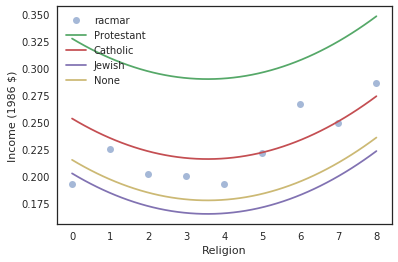

In [91]:
df1 = pd.DataFrame()
df1['fund'] = np.linspace(1, 1)
df1['fund2'] = df1['fund']**2
df1['attend'] = np.linspace(0, 8)
df1['attend2'] = df1['attend']**2
df1['relig']=1
pred12 = results.predict(df1)

gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['racmar'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)

df1['relig'] = np.linspace(1, 1)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Protestant')

df1['relig'] = np.linspace(2, 2)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Catholic')

df1['relig'] = np.linspace(3, 3)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Jewish')

df1['relig'] = np.linspace(4, 4)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='None')

plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

This shows that Protestants are the most likely to  favor the ban on interracial marriage while Jews and None are the least likely. This means that Protestants value purity and loyalty more than any of the other graphed groups, while Jews favor liberty and fairness the most. This graph also interestingly shows that people who attend religious meetings a more middling amount are less likely to support the ban on interracial marriage than either of the other extremes. Therefore people who attend services only a middling amount tend to value liberty and fairness more than their peers in any religion.

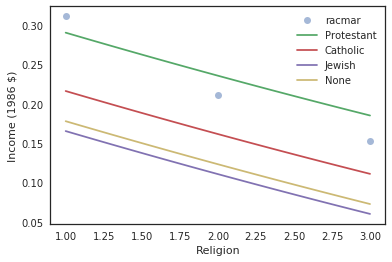

In [92]:
df1 = pd.DataFrame()
df1['fund'] = np.linspace(1, 3)
df1['fund2'] = df1['fund']**2
df1['attend'] = np.linspace(4, 4)
df1['attend2'] = df1['attend']**2
df1['relig']=1
pred12 = results.predict(df1)

gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['racmar'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)

df1['relig'] = np.linspace(1, 1)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Protestant')

df1['relig'] = np.linspace(2, 2)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Catholic')

df1['relig'] = np.linspace(3, 3)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Jewish')

df1['relig'] = np.linspace(4, 4)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='None')

plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

# Abortion

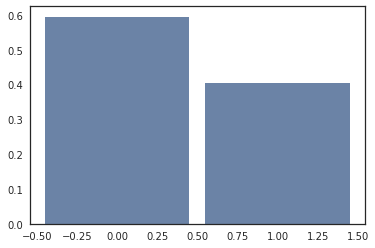

In [25]:
gss = pd.read_hdf('gss.hdf5', 'gss') 
rows = gss['relig'] > 97
gss.loc[rows, 'relig'] = None

rows = gss['attend'] == 9
gss.loc[rows, 'attend'] = None

rows = gss['fund'] == 9
gss.loc[rows, 'fund'] = None

gss['abany'].replace([0, 8, 9], np.nan, inplace=True)
gss['abany'].replace(2, 0, inplace=True)
pmf=thinkstats2.Pmf(gss['abany'])
thinkplot.Hist(pmf)
thinkplot.show()

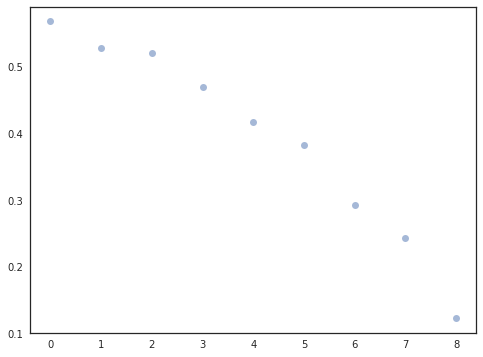

In [26]:
gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['abany'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.show()

In [27]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
gss['attend2']= gss['attend']**2
model = smf.ols('abany ~ attend + attend2', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  abany   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1593.
Date:                Sun, 07 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:57:07   Log-Likelihood:                -23226.
No. Observations:               35000   AIC:                         4.646e+04
Df Residuals:                   34997   BIC:                         4.648e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5631      0.005    103.181      0.000       0.552       0.574
attend        -0.0148      0.004     -4.230      0.000      -0.022      -0.008
attend2       -0.0047      0.000    -10.760      0.000      -0.006      -0.004
==============================================================================
Omnibus:                   182074.578   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4131.291
Skew:                           0.305   Prob(JB):                         0.00
Kurtosis:                       1.432   Cond. No.                         76.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

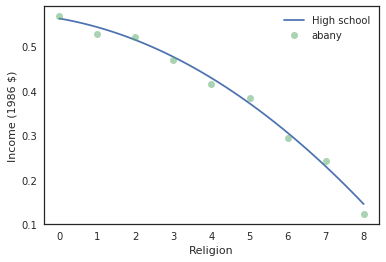

In [28]:
df = pd.DataFrame()
df['attend'] = np.linspace(0, 8)
df['attend2'] = df['attend']**2
pred12 = results.predict(df)

gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['abany'].mean()

plt.plot(df['attend'], pred12, label='High school')

plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

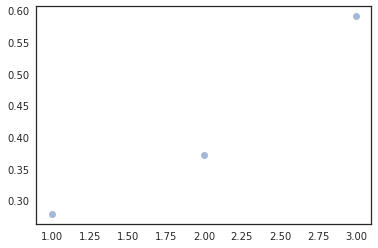

In [29]:
gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['abany'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.show()

In [30]:
gss['fund2']= gss['fund']**2
model = smf.ols('abany ~ fund + fund2', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  abany   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     1098.
Date:                Sun, 07 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:57:07   Log-Likelihood:                -22914.
No. Observations:               33978   AIC:                         4.583e+04
Df Residuals:                   33975   BIC:                         4.586e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3102      0.019     16.415      0.000       0.273       0.347
fund          -0.0939      0.021     -4.471      0.000      -0.135      -0.053
fund2          0.0625      0.005     11.950      0.000       0.052       0.073
==============================================================================
Omnibus:                   172381.302   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4398.888
Skew:                           0.387   Prob(JB):                         0.00
Kurtosis:                       1.416   Cond. No.                         63.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

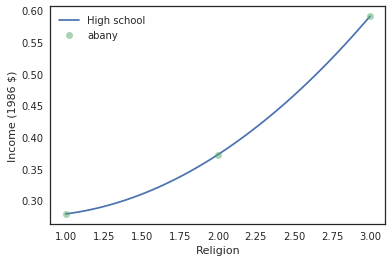

In [31]:
df = pd.DataFrame()
df['fund'] = np.linspace(1, 3)
df['fund2'] = df['fund']**2
pred12 = results.predict(df)

gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['abany'].mean()

plt.plot(df['fund'], pred12, label='High school')

plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

In [32]:
model = smf.ols('abany ~ attend + attend2 + fund + fund2 + C(relig)', data=gss)
results = model.fit()
results.summary()

/home/jobanner/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  abany   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     445.7
Date:                Sun, 07 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:57:08   Log-Likelihood:                -21698.
No. Observations:               33720   AIC:                         4.342e+04
Df Residuals:                   33709   BIC:                         4.351e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3651      0.025     14.327      0.000       0.315       0.415
C(relig)[T.2.0]     -0.0239      0.008     -2.946      0.003      -0.040      -0.008
C(relig)[T.3.0]      0.2420      0.019     12.655      0.000       0.205       0.279
C(relig)[T.4.0]      0.0500      0.011      4.552      0.000       0.028       0.072
C(relig)[T.5.0]     -0.0873      0.206     -0.424      0.672      -0.491       0.317
C(relig)[T.6.0]    3.87e-17    2.5e-16      0.155      0.877   -4.52e-16    5.29e-16
C(relig)[T.7.0]  -7.923e-18   3.96e-17     -0.200      0.841   -8.55e-17    6.97e-17
C(relig)[T.8.0]  -2.168e-17   4.49e-17     -0.483      0.629    -1.1e-16    6.64e-17
C(relig)[T.9.0]  -1.921e-17   1.06e-17     -1.812      0.070      -4e-17    1.57e-18
C(relig)[T.10.0]     0.1966      0.056      3.516      0.000       0.087       0.306
C(relig)[T.11.0]     0.0310      0.024      1.314      0.189      -0.015       0.077
C(relig)[T.12.0]          0          0        nan        nan           0           0
C(relig)[T.13.0]          0          0        nan        nan           0           0
attend               0.0068      0.004      1.794      0.073      -0.001       0.014
attend2             -0.0060      0.000    -13.179      0.000      -0.007      -0.005
fund                 0.0421      0.030      1.402      0.161      -0.017       0.101
fund2                0.0123      0.008      1.606      0.108      -0.003       0.027
==============================================================================
Omnibus:                   273098.139   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3446.516
Skew:                           0.328   Prob(JB):                         0.00
Kurtosis:                       1.578   Cond. No.                     8.81e+35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.31e-65. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

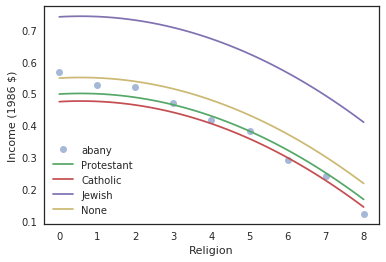

In [33]:
df1 = pd.DataFrame()
df1['fund'] = np.linspace(2, 2)
df1['fund2'] = df1['fund']**2
df1['attend'] = np.linspace(0, 8)
df1['attend2'] = df1['attend']**2
df1['relig']=1
pred12 = results.predict(df1)

gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['abany'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)

df1['relig'] = np.linspace(1, 1)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Protestant')

df1['relig'] = np.linspace(2, 2)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Catholic')

df1['relig'] = np.linspace(3, 3)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Jewish')

df1['relig'] = np.linspace(4, 4)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='None')

plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

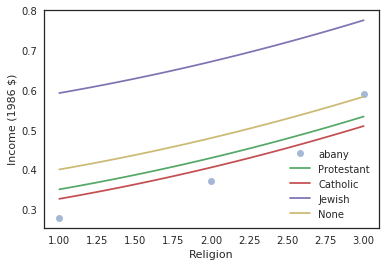

In [34]:
df1 = pd.DataFrame()
df1['fund'] = np.linspace(1, 3)
df1['fund2'] = df1['fund']**2
df1['attend'] = np.linspace(4, 4)
df1['attend2'] = df1['attend']**2
df1['relig']=1
pred12 = results.predict(df1)

gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['abany'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)

df1['relig'] = np.linspace(1, 1)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Protestant')

df1['relig'] = np.linspace(2, 2)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Catholic')

df1['relig'] = np.linspace(3, 3)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Jewish')

df1['relig'] = np.linspace(4, 4)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='None')

plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

#you have been hacked, i'm sorry for you loss

# Marijuana

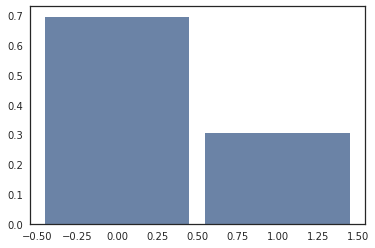

In [35]:
gss = pd.read_hdf('gss.hdf5', 'gss') 
rows = gss['relig'] > 97
gss.loc[rows, 'relig'] = None

rows = gss['attend'] == 9
gss.loc[rows, 'attend'] = None

rows = gss['fund'] == 9
gss.loc[rows, 'fund'] = None

gss['grass'].replace([0, 8, 9], np.nan, inplace=True)
gss['grass'].replace(2, 0, inplace=True)
pmf=thinkstats2.Pmf(gss['grass'])
thinkplot.Hist(pmf)
thinkplot.show()

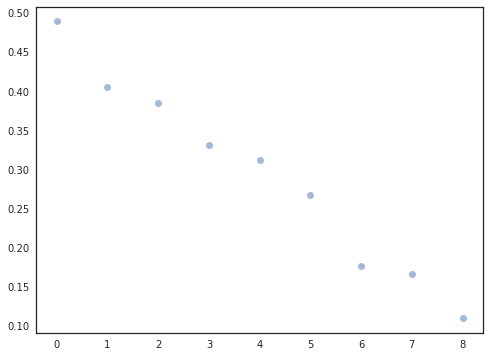

In [36]:
gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['grass'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.show()

In [37]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
gss['attend2']= gss['attend']**2
model = smf.ols('grass ~ attend + attend2', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grass   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1383.
Date:                Sun, 07 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:57:09   Log-Likelihood:                -21738.
No. Observations:               35877   AIC:                         4.348e+04
Df Residuals:                   35874   BIC:                         4.351e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4793      0.005     94.317      0.000       0.469       0.489
attend        -0.0474      0.003    -14.545      0.000      -0.054      -0.041
attend2        0.0003      0.000      0.656      0.512      -0.001       0.001
==============================================================================
Omnibus:                    18431.244   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5149.051
Skew:                           0.744   Prob(JB):                         0.00
Kurtosis:                       1.890   Cond. No.                         76.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

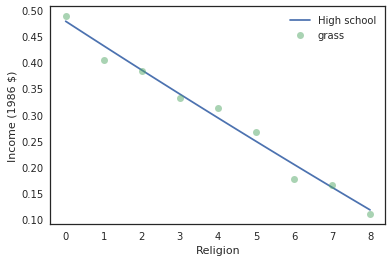

In [38]:
df = pd.DataFrame()
df['attend'] = np.linspace(0, 8)
df['attend2'] = df['attend']**2
pred12 = results.predict(df)

gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['grass'].mean()

plt.plot(df['attend'], pred12, label='High school')

plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

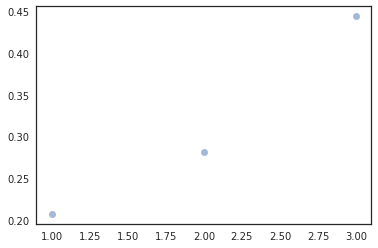

In [39]:
gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['grass'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.show()

In [40]:
gss['fund2']= gss['fund']**2
model = smf.ols('grass ~ fund + fund2', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grass   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     708.2
Date:                Sun, 07 Apr 2019   Prob (F-statistic):          3.39e-302
Time:                        15:57:09   Log-Likelihood:                -21508.
No. Observations:               34723   AIC:                         4.302e+04
Df Residuals:                   34720   BIC:                         4.305e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2231      0.018     12.602      0.000       0.188       0.258
fund          -0.0603      0.020     -3.073      0.002      -0.099      -0.022
fund2          0.0447      0.005      9.144      0.000       0.035       0.054
==============================================================================
Omnibus:                    19697.917   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5762.812
Skew:                           0.825   Prob(JB):                         0.00
Kurtosis:                       1.877   Cond. No.                         63.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

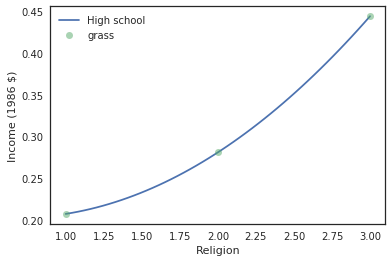

In [41]:
df = pd.DataFrame()
df['fund'] = np.linspace(1, 3)
df['fund2'] = df['fund']**2
pred12 = results.predict(df)

gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['grass'].mean()

plt.plot(df['fund'], pred12, label='High school')

plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

In [42]:
model = smf.ols('grass ~ attend + attend2 + fund + fund2 + C(relig)', data=gss)
results = model.fit()
results.summary()

/home/jobanner/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grass   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     396.1
Date:                Sun, 07 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:57:09   Log-Likelihood:                -20168.
No. Observations:               34450   AIC:                         4.036e+04
Df Residuals:                   34439   BIC:                         4.045e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2970      0.024     12.505      0.000       0.250       0.344
C(relig)[T.2.0]      0.0400      0.007      5.339      0.000       0.025       0.055
C(relig)[T.3.0]      0.1781      0.018      9.899      0.000       0.143       0.213
C(relig)[T.4.0]      0.2453      0.010     23.684      0.000       0.225       0.266
C(relig)[T.5.0]      0.0900      0.131      0.686      0.493      -0.167       0.347
C(relig)[T.6.0]  -3.897e-17   4.14e-17     -0.940      0.347    -1.2e-16    4.23e-17
C(relig)[T.7.0]   2.296e-18    8.4e-18      0.273      0.785   -1.42e-17    1.88e-17
C(relig)[T.8.0]  -1.665e-17   2.44e-17     -0.683      0.494   -6.44e-17    3.11e-17
C(relig)[T.9.0]  -1.495e-18   9.77e-18     -0.153      0.878   -2.06e-17    1.77e-17
C(relig)[T.10.0]     0.1609      0.062      2.576      0.010       0.038       0.283
C(relig)[T.11.0]     0.1761      0.023      7.529      0.000       0.130       0.222
C(relig)[T.12.0]          0          0        nan        nan           0           0
C(relig)[T.13.0]          0          0        nan        nan           0           0
attend              -0.0086      0.004     -2.409      0.016      -0.016      -0.002
attend2             -0.0030      0.000     -7.026      0.000      -0.004      -0.002
fund                 0.0395      0.028      1.416      0.157      -0.015       0.094
fund2               -0.0045      0.007     -0.630      0.529      -0.019       0.010
==============================================================================
Omnibus:                     7747.278   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4532.252
Skew:                           0.762   Prob(JB):                         0.00
Kurtosis:                       2.085   Cond. No.                     1.06e+36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.06e-65. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

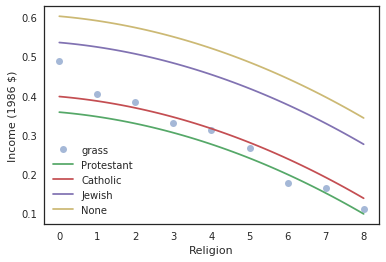

In [43]:
df1 = pd.DataFrame()
df1['fund'] = np.linspace(2, 2)
df1['fund2'] = df1['fund']**2
df1['attend'] = np.linspace(0, 8)
df1['attend2'] = df1['attend']**2
df1['relig']=1
pred12 = results.predict(df1)

gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['grass'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)

df1['relig'] = np.linspace(1, 1)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Protestant')

df1['relig'] = np.linspace(2, 2)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Catholic')

df1['relig'] = np.linspace(3, 3)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Jewish')

df1['relig'] = np.linspace(4, 4)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='None')

plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

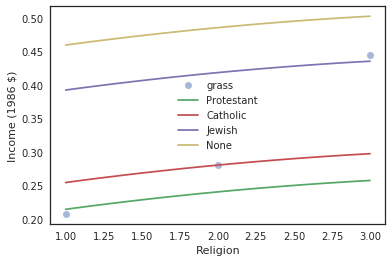

In [44]:
df1 = pd.DataFrame()
df1['fund'] = np.linspace(1, 3)
df1['fund2'] = df1['fund']**2
df1['attend'] = np.linspace(5, 5)
df1['attend2'] = df1['attend']**2
df1['relig']=1
pred12 = results.predict(df1)

gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['grass'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)

df1['relig'] = np.linspace(1, 1)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Protestant')

df1['relig'] = np.linspace(2, 2)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Catholic')

df1['relig'] = np.linspace(3, 3)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Jewish')

df1['relig'] = np.linspace(4, 4)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='None')

plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

# Women in Politics

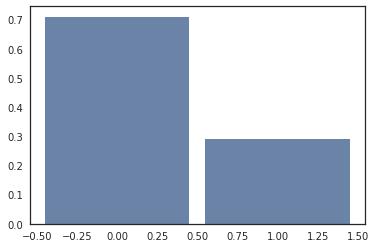

In [45]:
gss = pd.read_hdf('gss.hdf5', 'gss') 
rows = gss['relig'] > 97
gss.loc[rows, 'relig'] = None

rows = gss['attend'] == 9
gss.loc[rows, 'attend'] = None

rows = gss['fund'] == 9
gss.loc[rows, 'fund'] = None

gss['fepol'].replace([0, 8, 9], np.nan, inplace=True)
gss['fepol'].replace(2, 0, inplace=True)
pmf=thinkstats2.Pmf(gss['fepol'])
thinkplot.Hist(pmf)
thinkplot.show()

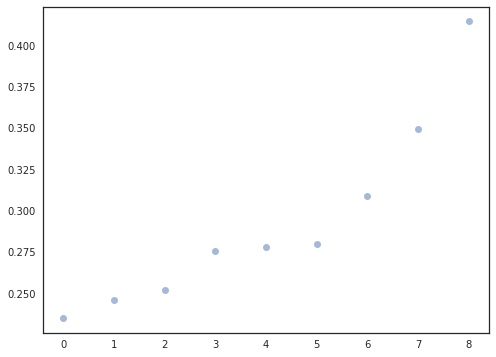

In [46]:
gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['fepol'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.show()

In [47]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
gss['attend2']= gss['attend']**2
model = smf.ols('fepol ~ attend + attend2', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  fepol   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     215.1
Date:                Sun, 07 Apr 2019   Prob (F-statistic):           1.63e-93
Time:                        15:57:10   Log-Likelihood:                -20357.
No. Observations:               32708   AIC:                         4.072e+04
Df Residuals:                   32705   BIC:                         4.075e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2408      0.005     45.516      0.000       0.230       0.251
attend        -0.0016      0.003     -0.473      0.636      -0.008       0.005
attend2        0.0026      0.000      5.974      0.000       0.002       0.003
==============================================================================
Omnibus:                    17702.950   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6178.719
Skew:                           0.909   Prob(JB):                         0.00
Kurtosis:                       1.890   Cond. No.                         74.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

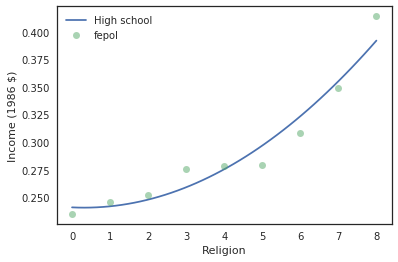

In [48]:
df = pd.DataFrame()
df['attend'] = np.linspace(0, 8)
df['attend2'] = df['attend']**2
pred12 = results.predict(df)

gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['fepol'].mean()

plt.plot(df['attend'], pred12, label='High school')

plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

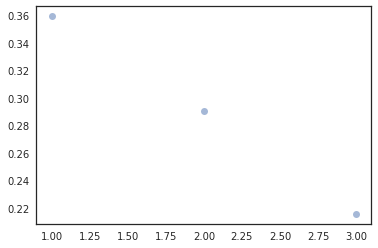

In [49]:
gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['fepol'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.show()

In [50]:
gss['fund2']= gss['fund']**2
model = smf.ols('fepol ~ fund + fund2', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  fepol   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sun, 07 Apr 2019   Prob (F-statistic):           2.09e-99
Time:                        15:57:11   Log-Likelihood:                -19765.
No. Observations:               31738   AIC:                         3.954e+04
Df Residuals:                   31735   BIC:                         3.956e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4216      0.019     22.532      0.000       0.385       0.458
fund          -0.0588      0.021     -2.853      0.004      -0.099      -0.018
fund2         -0.0033      0.005     -0.644      0.520      -0.013       0.007
==============================================================================
Omnibus:                    18484.423   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5943.897
Skew:                           0.899   Prob(JB):                         0.00
Kurtosis:                       1.877   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

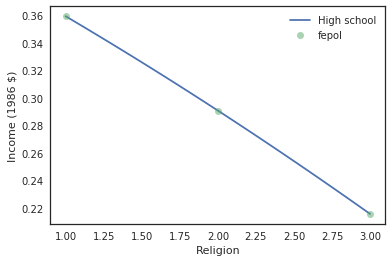

In [51]:
df = pd.DataFrame()
df['fund'] = np.linspace(1, 3)
df['fund2'] = df['fund']**2
pred12 = results.predict(df)

gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['fepol'].mean()

plt.plot(df['fund'], pred12, label='High school')

plt.plot(mean_income_by_religion, 'o', alpha=0.5)
plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

In [52]:
results= smf.ols('fepol ~ attend + attend2 + fund + fund2 + C(relig)', data=gss).fit()
results.summary()

/home/jobanner/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/jobanner/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  fepol   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     75.60
Date:                Sun, 07 Apr 2019   Prob (F-statistic):          4.75e-154
Time:                        15:57:11   Log-Likelihood:                -19476.
No. Observations:               31511   AIC:                         3.897e+04
Df Residuals:                   31500   BIC:                         3.907e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3070      0.026     11.884      0.000       0.256       0.358
C(relig)[T.2.0]     -0.0551      0.008     -6.808      0.000      -0.071      -0.039
C(relig)[T.3.0]     -0.0421      0.019     -2.226      0.026      -0.079      -0.005
C(relig)[T.4.0]     -0.0507      0.011     -4.612      0.000      -0.072      -0.029
C(relig)[T.5.0]      0.2931      0.201      1.458      0.145      -0.101       0.687
C(relig)[T.6.0]   1.934e-16   1.85e-16      1.044      0.297    -1.7e-16    5.57e-16
C(relig)[T.7.0]   7.799e-17    6.4e-17      1.219      0.223   -4.75e-17    2.03e-16
C(relig)[T.8.0]    1.23e-16   8.66e-17      1.421      0.155   -4.67e-17    2.93e-16
C(relig)[T.9.0]  -1.135e-17   2.01e-17     -0.565      0.572   -5.07e-17     2.8e-17
C(relig)[T.10.0]     0.0659      0.062      1.071      0.284      -0.055       0.187
C(relig)[T.11.0]    -0.0891      0.024     -3.713      0.000      -0.136      -0.042
C(relig)[T.12.0]          0          0        nan        nan           0           0
C(relig)[T.13.0]          0          0        nan        nan           0           0
attend              -0.0144      0.004     -3.823      0.000      -0.022      -0.007
attend2              0.0034      0.000      7.354      0.000       0.002       0.004
fund                 0.0476      0.030      1.568      0.117      -0.012       0.107
fund2               -0.0236      0.008     -3.039      0.002      -0.039      -0.008
==============================================================================
Omnibus:                    16083.742   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5721.412
Skew:                           0.887   Prob(JB):                         0.00
Kurtosis:                       1.900   Cond. No.                     2.51e+36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.86e-66. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

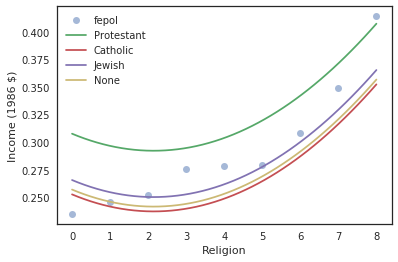

In [53]:
df1 = pd.DataFrame()
df1['fund'] = np.linspace(2, 2)
df1['fund2'] = df1['fund']**2
df1['attend'] = np.linspace(0, 8)
df1['attend2'] = df1['attend']**2
df1['relig']=1
pred12 = results.predict(df1)

gssReg=gss.groupby('attend')
mean_income_by_religion = gssReg['fepol'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)

df1['relig'] = np.linspace(1, 1)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Protestant')

df1['relig'] = np.linspace(2, 2)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Catholic')

df1['relig'] = np.linspace(3, 3)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='Jewish')

df1['relig'] = np.linspace(4, 4)
pred12 = results.predict(df1)
plt.plot(df1['attend'], pred12, label='None')

plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

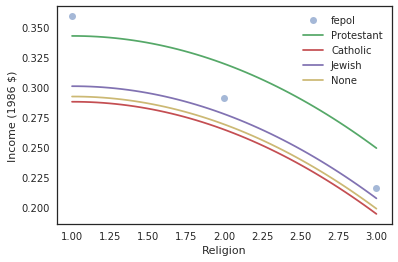

In [54]:
df1 = pd.DataFrame()
df1['fund'] = np.linspace(1, 3)
df1['fund2'] = df1['fund']**2
df1['attend'] = np.linspace(5, 5)
df1['attend2'] = df1['attend']**2
df1['relig']=1
pred12 = results.predict(df1)

gssReg=gss.groupby('fund')
mean_income_by_religion = gssReg['fepol'].mean()
plt.plot(mean_income_by_religion, 'o', alpha=0.5)

df1['relig'] = np.linspace(1, 1)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Protestant')

df1['relig'] = np.linspace(2, 2)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Catholic')

df1['relig'] = np.linspace(3, 3)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='Jewish')

df1['relig'] = np.linspace(4, 4)
pred12 = results.predict(df1)
plt.plot(df1['fund'], pred12, label='None')

plt.xlabel('Religion')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()